**Import libraries**

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

**Load Dataset**

In [86]:
data = load_iris()  # using iris as it have only 4 featute and 3 classes; and we know it doesn't have noise and all :)
X = data.data
y = data.target

In [76]:
np.isnan(X).sum() # although we know that we checked it again ;this is the numpy method

0

In [77]:
df = pd.DataFrame(X)
df.isna().sum() # here we use pandas way 

0    0
1    0
2    0
3    0
dtype: int64

In [78]:
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [79]:
pd.DataFrame(X).describe() # representation of dataset 

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Train–Test Split**

In [80]:
# here we are spliting dataset into training and testing part (70 and 30 ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

**Build Decision Tree**

In [81]:
model = DecisionTreeClassifier(criterion="entropy") # it is called criterions which choose how  to split dataset based on their features 
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

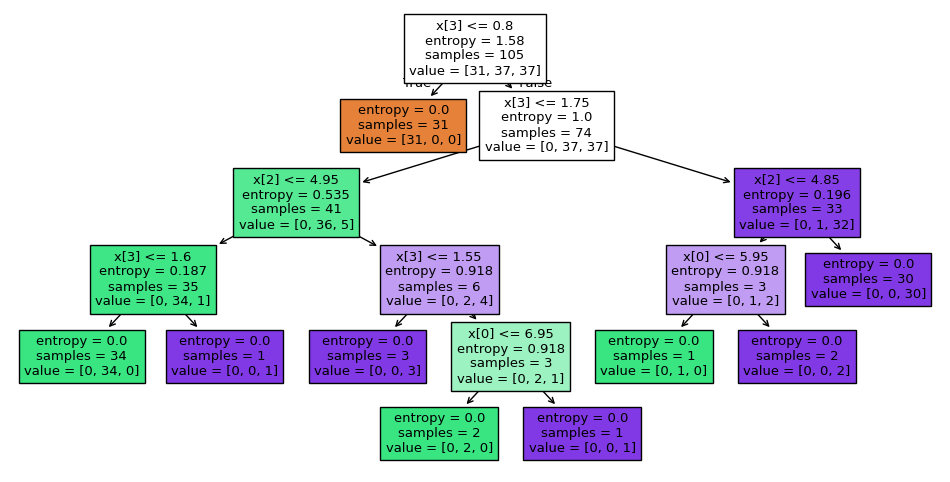

In [82]:
# we are represent the tree here 
plt.figure(figsize=(12,6))
plot_tree(model, filled=True)
plt.show()

**Prediction**

In [83]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

**Accuracy & Metrics**

In [88]:
# its evaluate the tree using accuracy, confusion matrix, and classification report.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9777777777777777
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [87]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Random State:", 42)
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Random State: 42
Training Accuracy: 1.0
Testing Accuracy: 1.0


In [90]:
# here i think overfitting happens 
model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,  # Limits the tree to only 3 levels.
    random_state=42 
)

In [93]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Random State:", 42)
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Random State: 42
Training Accuracy: 0.9523809523809523
Testing Accuracy: 0.9777777777777777


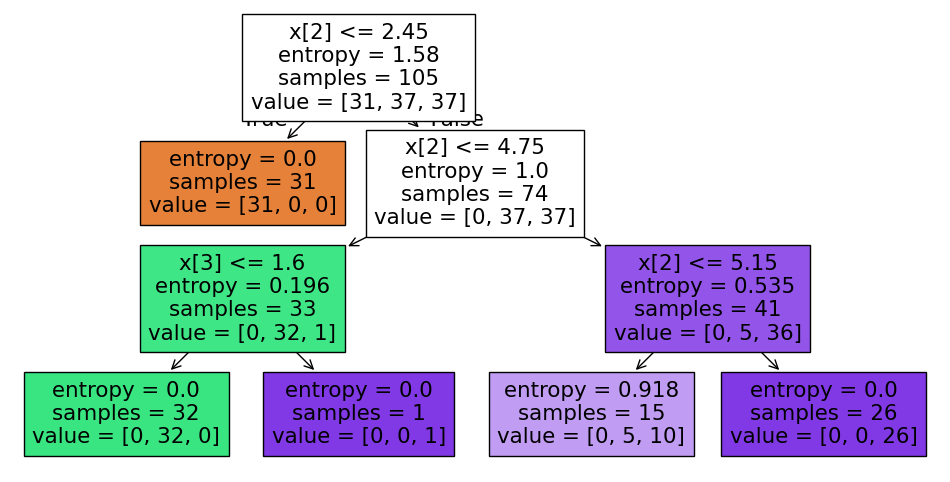

In [94]:
# we are represent the tree here 
plt.figure(figsize=(12,6))
plot_tree(model, filled=True)
plt.show()